In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.reset_orig()

## Чтение данных

In [71]:
data = pd.read_csv('video_games_sales.csv')

## Визуализация
### 1. Посмотрим, сколько игр выпускалось по жанрам (за все время)

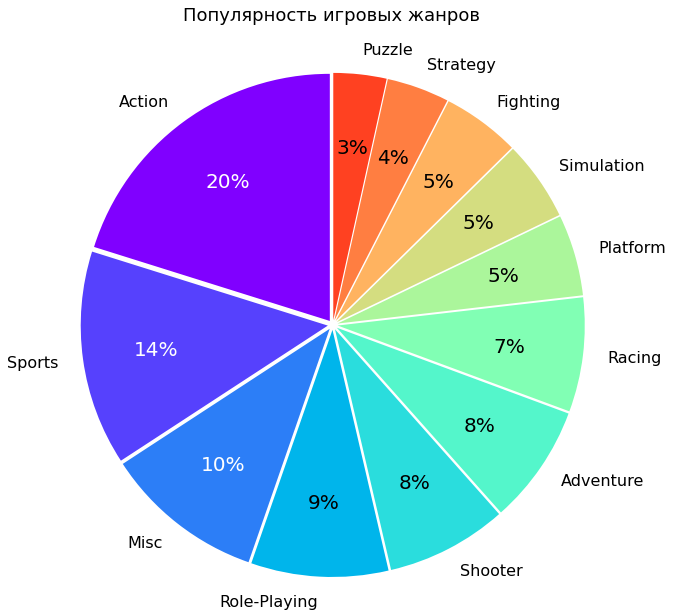

In [72]:
genre_data = data['Genre'].value_counts().rename_axis('Genre').reset_index(name='counts')
genre_data = genre_data.dropna()

labels = genre_data['Genre']
sizes = genre_data['counts']

explode = np.ones(len(sizes)) * 0.020

fig1, ax1 = plt.subplots(figsize=(10,10))
theme = plt.get_cmap('rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
patches, texts, autotexts = ax1.pie(sizes, labels=labels,
        shadow=False, explode=explode, pctdistance=0.7, startangle=90, autopct='%.0f%%', textprops={'fontsize': 16})
ax1.axis('equal')  
ax1.set_title('Популярность игровых жанров', size=18, y=1.05)
plt.setp(autotexts, size=20)
autotexts[0].set_color('white')
autotexts[1].set_color('white')
autotexts[2].set_color('white')

### 2. Посмотрим, сколько игр выпущено за каждый год

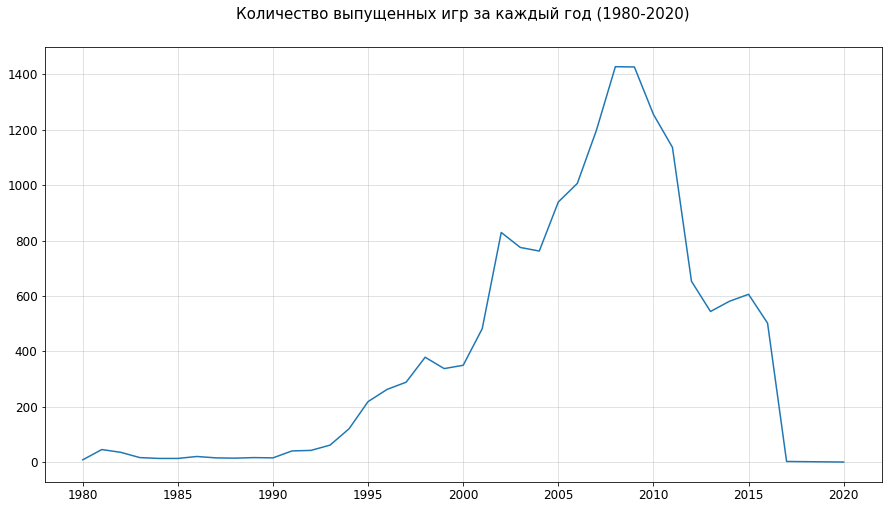

In [73]:
years_data = data['Year_of_Release']
years_data = years_data.dropna()
years_data = years_data.to_numpy()
unique, counts = np.unique(years_data, return_counts=True)

fig, ax2 = plt.subplots(figsize=(15,8))
ax2.plot(unique, counts)
ax2.grid(alpha=0.45)
ax2.set_title('Количество выпущенных игр за каждый год (1980-2020)', size=15, y=1.05)
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)

### 3. Посмотрим на популярность платформ

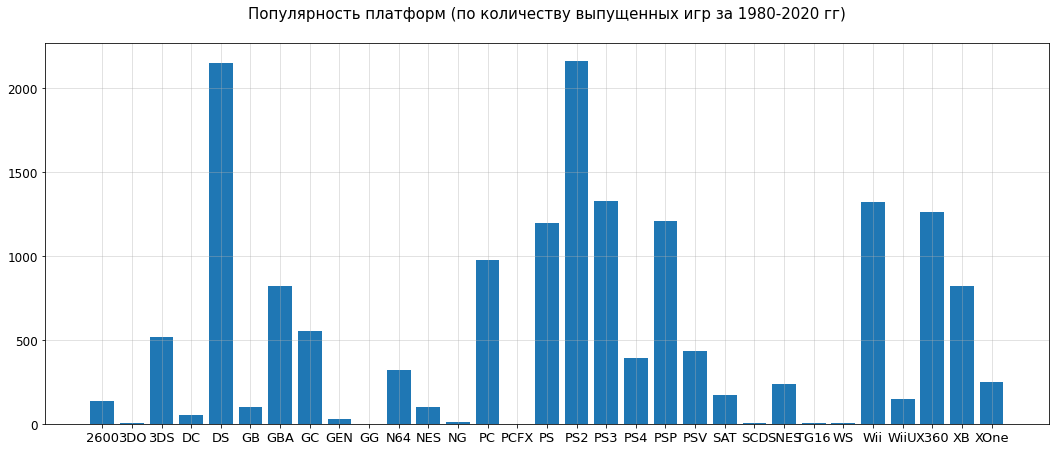

In [74]:
platform_data = data['Platform'].copy()
unique, counts = np.unique(platform_data, return_counts=True)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(unique, counts, align='center', width=0.8)
ax.grid(alpha=0.45)
ax.set_title('Популярность платформ (по количеству выпущенных игр за 1980-2020 гг)', size=15, y=1.05)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=12)


### 4. Для одной из двух наиболее популярных платформ (DS) посмотрим на количество проданных копий игр 

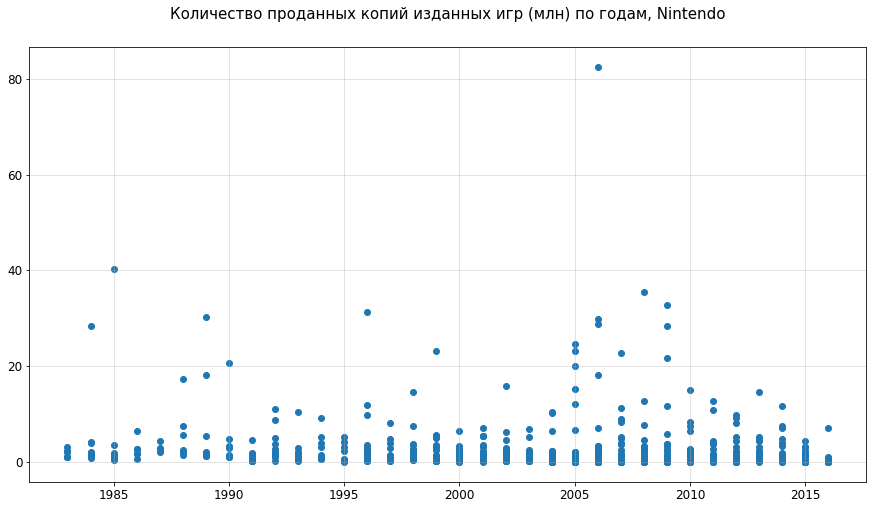

In [75]:
sales_data = data[['Publisher', 'Global_Sales']].copy()

sales_data = sales_data.groupby('Publisher')[['Global_Sales']].sum()
sales_data = sales_data.sort_values(by=['Global_Sales'])

popular_publisher_data = data[['Name','Year_of_Release','Global_Sales']].loc[data['Publisher']=='Nintendo'].copy()

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(popular_publisher_data['Year_of_Release'], popular_publisher_data['Global_Sales'])
ax.grid(alpha=0.45)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_title('Количество проданных копий изданных игр (млн) по годам, Nintendo', size=15, y=1.05);

In [76]:
print(popular_publisher_data[popular_publisher_data['Global_Sales'] == max(popular_publisher_data['Global_Sales'])])

         Name  Year_of_Release  Global_Sales
0  Wii Sports           2006.0         82.53


Самая продаваемая игра Nintendo "Wii Sports" была выпущена в 2006 году.

### 5. Посмотрим, сколько игр двух самых популярных жанров выпускают пять издателей с наибольшими продажами

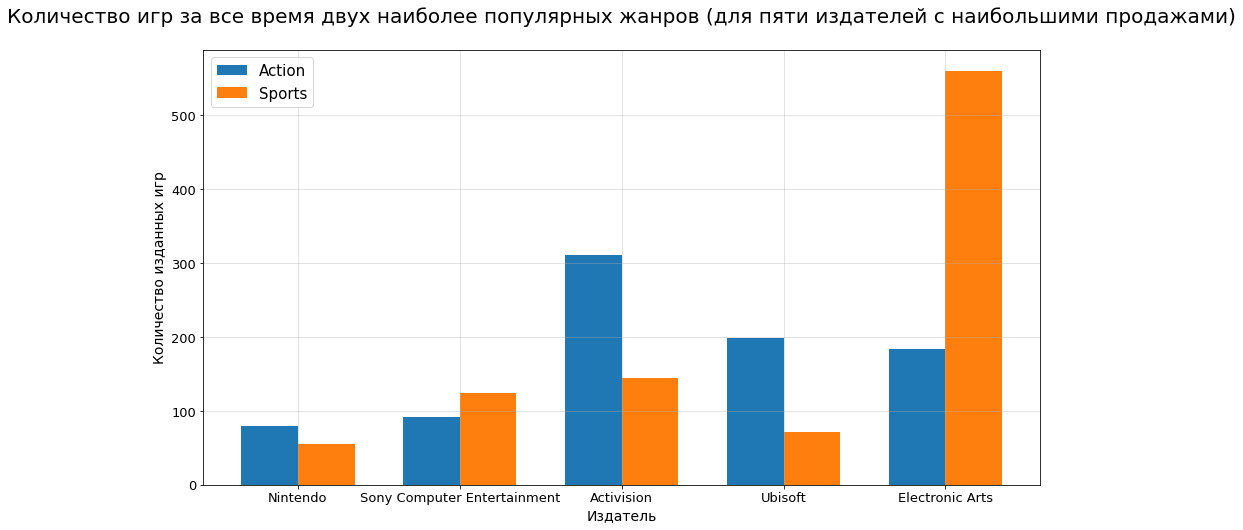

In [77]:
sales_data = data[['Publisher', 'Genre', 'Global_Sales']].copy()

sales_data = sales_data.groupby('Publisher')[['Global_Sales']].sum()

sales_data = sales_data.sort_values(by=['Global_Sales'], ascending=False)
data_top = sales_data.head(5)

top_publ = []
for row in data_top.index: 
    top_publ.append(row)
    
publ_genre_data = data[['Publisher','Genre']].loc[data['Publisher'].isin(top_publ)].copy()

result = {}
for i in range(len(publ_genre_data)):
    if publ_genre_data.iloc[i]['Publisher'] not in result:
        result[publ_genre_data.iloc[i]['Publisher']] = [0, 0]
    if publ_genre_data.iloc[i]['Genre'] == 'Action':
        result[publ_genre_data.iloc[i]['Publisher']][0] += 1
    elif publ_genre_data.iloc[i]['Genre'] == 'Sports':
        result[publ_genre_data.iloc[i]['Publisher']][1] += 1

labels = []
action = []
sports = []
for key, val in result.items():
    labels.append(key)
    action.append(val[0])
    sports.append(val[1])

x = np.arange(len(labels)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, action, width, label='Action')
rects2 = ax.bar(x + width/2, sports, width, label='Sports')
ax.set_xlabel('Издатель', fontsize=14)
ax.set_ylabel('Количество изданных игр', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 15})

ax.grid(alpha=0.45)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title('Количество игр за все время двух наиболее популярных жанров (для пяти издателей с наибольшими продажами)', size=20, y=1.05);


За все рассматриваемое время бОльшая часть игр в жанре "спорт" была выпущена компанией EA

### 6. Для одного из издателей с наибольшими продажами посмотрим на рейтинги выпускаемых игр

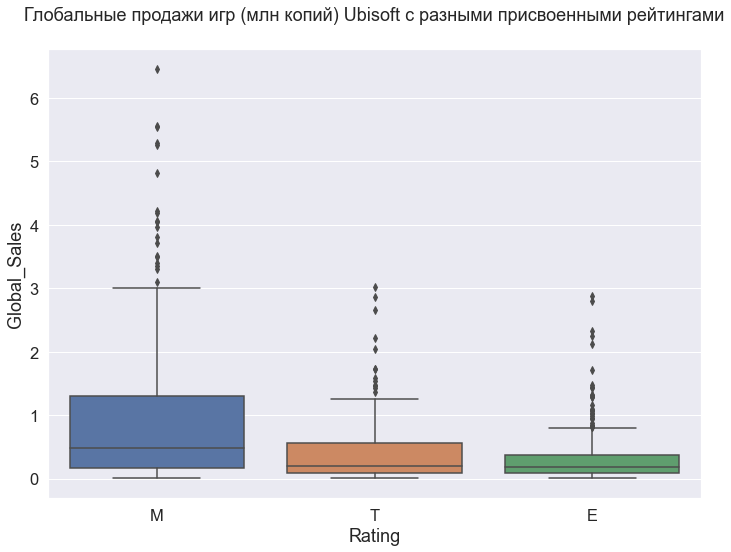

In [78]:
data_ratings = data[['Global_Sales', 'Rating']].loc[data['Publisher']=='Ubisoft'].copy()
data_ratings = data_ratings.dropna()
sns.set_theme(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})
ax_box = sns.boxplot(x='Rating', y='Global_Sales',data=data_ratings.loc[(data_ratings['Rating']=='E') | (data_ratings['Rating']=='M') | (data_ratings['Rating']=='T')]);
ax_box.set_title('Глобальные продажи игр (млн копий) Ubisoft с разными присвоенными рейтингами', y=1.05);


Для Ubisoft только игры с рейтингом М (Mature, для людей старше 17 лет) переходят отметку в 3 млн проданных копий. Для игр с этим рейтингом также характерно, что в целом они продаются бОльшим числом копий, чем игры Т (Teen, для подростков) и Е (Everyone, для всех)   